In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score


In [ ]:
df = pd.read_csv("data.csv")

In [ ]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [ ]:
# droping unnacessry colomns
df.drop(['date','waterfront','city', 'street','statezip', 'country'] ,axis=1,inplace=True)

In [ ]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,3,1340,0,1955,2005
1,2.384000e+06,5.0,2.50,3650,9050,2.0,4,5,3370,280,1921,0
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,4,1930,0,1966,0
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,4,1000,1000,1963,0
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,4,1140,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,4,1510,0,1954,1979
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,3,1460,0,1983,2009
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,3,3010,0,2009,0
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,3,1070,1020,1974,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   view           4600 non-null   int64  
 7   condition      4600 non-null   int64  
 8   sqft_above     4600 non-null   int64  
 9   sqft_basement  4600 non-null   int64  
 10  yr_built       4600 non-null   int64  
 11  yr_renovated   4600 non-null   int64  
dtypes: float64(4), int64(8)
memory usage: 431.4 KB


In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [ ]:
# rounding of values
df[['bedrooms','bathrooms','floors']] = round(df[['bedrooms','bathrooms','floors']])

In [ ]:
# fixing datatypes of all values
df[['bedrooms','bathrooms','floors']] = df[['bedrooms','bathrooms','floors']].astype('int64')
df.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3,2,1340,7912,2,0,3,1340,0,1955,2005
1,2384000.0,5,2,3650,9050,2,4,5,3370,280,1921,0
2,342000.0,3,2,1930,11947,1,0,4,1930,0,1966,0
3,420000.0,3,2,2000,8030,1,0,4,1000,1000,1963,0
4,550000.0,4,2,1940,10500,1,0,4,1140,800,1976,1992
5,490000.0,2,1,880,6380,1,0,3,880,0,1938,1994
6,335000.0,2,2,1350,2560,1,0,3,1350,0,1976,0
7,482000.0,4,2,2710,35868,2,0,3,2710,0,1989,0
8,452500.0,3,2,2430,88426,1,0,4,1570,860,1985,0
9,640000.0,4,2,1520,6200,2,0,3,1520,0,1945,2010


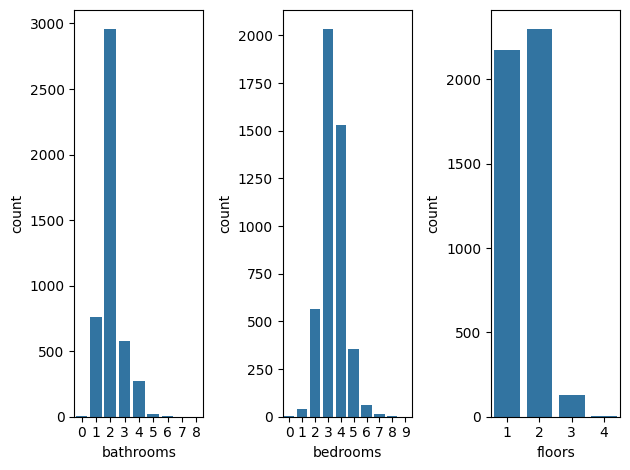

In [ ]:
# ploting number of bathrooms , bedrooms and floors
import matplotlib.pyplot as plt
import seaborn as sns

fig,ax = plt.subplots(1,3)
sns.countplot(data = df , x = "bathrooms" , ax = ax[0])
sns.countplot(data = df , x = "bedrooms", ax = ax[1])
sns.countplot(data = df , x = "floors", ax = ax[2])
plt.tight_layout()

<Axes: ylabel='price'>

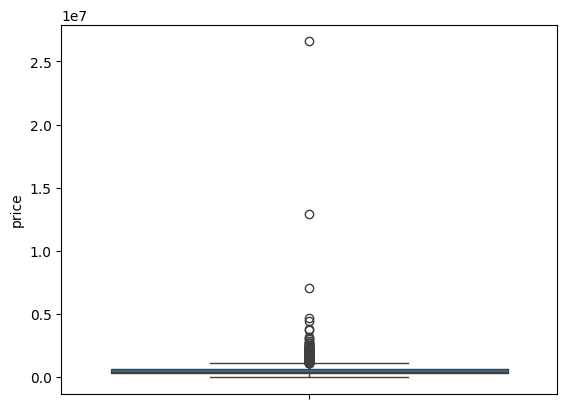

In [ ]:
# checking outliers
sns.boxplot(data=df , y = 'price')

# removing outliers
def removing_outlier(df , colomn):
    Q1 = df[colomn].quantile(0.25)
    Q3 = df[colomn].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - IQR*1.5
    higher = Q3 - IQR *1.5
    return df[(df[colomn]>=lower) & (df[colomn]<=higher)]

In [ ]:
df = removing_outlier(df , "price")

In [ ]:
df.shape

(117, 12)

In [ ]:
df.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
190,136500.0,3,2,1420,8580,1,0,3,1420,0,1962,2003
290,100000.0,2,1,910,22000,1,0,3,910,0,1956,2001
326,134000.0,2,2,980,5000,2,0,3,980,0,1922,2003
519,156000.0,3,1,970,8580,1,0,3,970,0,1959,1989
529,110000.0,3,1,1250,53143,1,0,5,1250,0,1945,0
574,155000.0,2,1,910,6232,1,0,3,910,0,1943,2002
588,90000.0,2,1,790,2640,1,0,3,790,0,1973,2013
638,155000.0,2,1,700,5200,1,0,5,700,0,1952,1998
667,139000.0,3,1,1100,17334,1,0,3,1100,0,1978,0
893,141800.0,2,1,930,4743,1,0,4,930,0,1942,1982


<Axes: ylabel='price'>

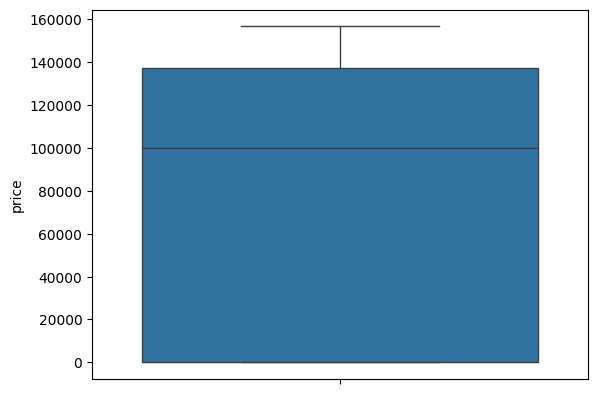

In [ ]:
sns.boxplot(data=df , y = 'price')

In [ ]:
X = df.drop("price",axis =1)
y = df['price']

# **Training on Linear Regression **




In [ ]:
# spliting the dataset
X_train,X_test , y_train,y_test = train_test_split(X,y ,test_size=0.2,random_state=42)

In [ ]:
# training on Linear Regression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
#evaulatin
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
MAE = mean_absolute_error(y_test,y_pred)
R_squared = r2_score(y_test,y_pred)

In [ ]:
print(f"MAE: {MAE}")
print(f"MSE: {MSE}")
print(f"RMSE: {RMSE}")
print(f"R² Score: {R_squared}")

MAE: 42929.53376816412
MSE: 2967043920.369709
RMSE: 54470.578483890815
R² Score: 0.14914475633966007


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# **Training on Random Forest**

In [ ]:
# training on Random Forest
model = RandomForestRegressor(n_estimators=100 , random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
#evaulatin on random forest
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
MAE = mean_absolute_error(y_test,y_pred)
R_squared = r2_score(y_test,y_pred)
print(f"MAE: {MAE}")
print(f"MSE: {MSE}")
print(f"RMSE: {RMSE}")
print(f"R² Score: {R_squared}")

MAE: 22291.785555543753
MSE: 1495480709.710324
RMSE: 38671.44566356841
R² Score: 0.5711429834542647
